In [14]:
#imports given by Dr.K
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#custom imports
import seaborn as sns
import pandas as pd

file_path = '/Users/lucasliu/Desktop/483data/2023-nyts-dataset-codebook-microsoft-excel/Prediction-Youth-and-Tobacco/nyts2023.csv'
df = pd.read_csv(file_path)

df.head()



/var/folders/4z/n7sr27qx5h18n91g81tmnsdh0000gn/T/ipykernel_13630/2643301406.py:23: DtypeWarning: Columns (690,691,692,703,706,708,709,710,711,712,713,714,715,716,717,718,719,720,721,1172,1174,1185,1214) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,artificial_id,Non_SOGI_School,Location,QN1,QN2,QN3,QN4a,QN4b,QN4c,QN4d,...,CBIDIS,CHTP,CPOUCH,Stratum,Stratum_num,PSU,PSU_num,WT_analysis,QN141R,QN142R
0,B2100007,2,1.0,5.0,2.0,2.0,1.0,NaN,NaN,NaN,...,1.0,2.0,2.0,S05,5,P21,21,4232.149929,NaN,NaN
1,B2100018,2,2.0,8.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,S02,2,P09,9,514.656322,NaN,NaN
2,B2100021,2,1.0,5.0,1.0,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,S08,8,P32,32,244.855983,NaN,NaN
3,B2100035,2,1.0,4.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,2.0,S08,8,P34,34,775.983192,NaN,NaN
4,B2100036,2,1.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,...,2.0,2.0,2.0,S04,4,P16,16,353.735565,1.0,1.0


Displaying Columns

In [15]:
print(df.columns)


Index(['artificial_id', 'Non_SOGI_School', 'Location', 'QN1', 'QN2', 'QN3',
       'QN4a', 'QN4b', 'QN4c', 'QN4d',
       ...
       'CBIDIS', 'CHTP', 'CPOUCH', 'Stratum', 'Stratum_num', 'PSU', 'PSU_num',
       'WT_analysis', 'QN141R', 'QN142R'],
      dtype='object', length=1469)


Data Visualization:

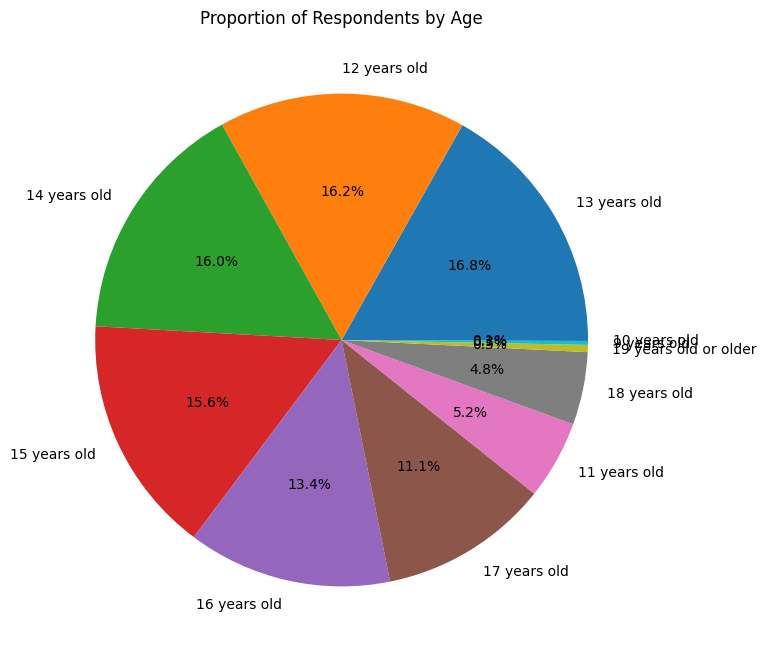

In [16]:
#pie chart for age
age_mapping = {
    1: '9 years old',
    2: '10 years old',
    3: '11 years old',
    4: '12 years old',
    5: '13 years old',
    6: '14 years old',
    7: '15 years old',
    8: '16 years old',
    9: '17 years old',
    10: '18 years old',
    11: '19 years old or older'
}

# Replace the numeric responses with the corresponding age labels
df['age_labeled'] = df['QN1'].map(age_mapping)

# Plotting the pie chart with age labels
df['age_labeled'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Proportion of Respondents by Age')
plt.ylabel('')
plt.show()



Check for missing values

In [17]:
df.isnull().sum()

artificial_id         0
Non_SOGI_School       0
Location             69
QN1                  90
QN2                 152
                   ... 
PSU_num               0
WT_analysis           0
QN141R             4200
QN142R             3991
age_labeled          90
Length: 1470, dtype: int64

Handle missing values. Since the questionnarie have many conditional questions, meaning they split the respondents into different groups of questions, we need to implement -1 for the groups that respondents were skipped. 

First, check if there are any cells that have non-numerical values:

In [18]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['artificial_id', 'Q1', 'Q2', 'Q3', 'Q4a', 'Q4b', 'Q4c', 'Q4d', 'Q4e',
       'Q5a',
       ...
       'Q143', 'Q144', 'Q145', 'Q146', 'Q147', 'Q148', 'Q149', 'Stratum',
       'PSU', 'age_labeled'],
      dtype='object', length=744)


There are many non-numerical cell blocks, changing them to numerical

In [19]:
# Check if any columns contain numeric-like data stored as strings
for column in df.columns:
    # Ensure the column is of object (string-like) type
    if df[column].dtype == 'object':
        # Now safely apply the str accessor
        if df[column].str.isnumeric().any():
            print(f"Column {column} contains numeric-like data but is stored as a string.")


Column Q1 contains numeric-like data but is stored as a string.
Column Q2 contains numeric-like data but is stored as a string.
Column Q3 contains numeric-like data but is stored as a string.
Column Q4a contains numeric-like data but is stored as a string.
Column Q4b contains numeric-like data but is stored as a string.
Column Q4c contains numeric-like data but is stored as a string.
Column Q4d contains numeric-like data but is stored as a string.
Column Q4e contains numeric-like data but is stored as a string.
Column Q5a contains numeric-like data but is stored as a string.
Column Q5b contains numeric-like data but is stored as a string.
Column Q5c contains numeric-like data but is stored as a string.
Column Q5d contains numeric-like data but is stored as a string.
Column Q5e contains numeric-like data but is stored as a string.
Column Q6 contains numeric-like data but is stored as a string.
Column Q7 contains numeric-like data but is stored as a string.
Column Q8 contains numeric-lik

In [20]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

check again to see if there are stil values that are strs that need to be converted to numerical

In [21]:
for column in df.columns:
    # Ensure the column is of object (string-like) type
    if df[column].dtype == 'object':
        # Now safely apply the str accessor
        if df[column].str.isnumeric().any():
            print(f"Column {column} contains numeric-like data but is stored as a string.")

In [22]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index([], dtype='object')


Now that all values are converted into numerical, we can fill the skipped values as 0 since it is a reasonable skip value

now check missing values again

In [23]:
df.isnull().sum()

artificial_id      22069
Non_SOGI_School        0
Location              69
QN1                   90
QN2                  152
                   ...  
PSU_num                0
WT_analysis            0
QN141R              4200
QN142R              3991
age_labeled        22069
Length: 1470, dtype: int64

These null values are due to the conditional questions from the questionnaire

We can handle the missing values that are abnormal, then fill zero with the "skipped" conditions


In [24]:
#Location
most_frequent_value = df['Location'].mode()[0]

df['Location'] = df['Location'].fillna(most_frequent_value)

# Check how many missing values are in the 'Location' column
missing_values_in_location = df['Location'].isnull().sum()

print(f"Number of missing values in the 'Location' column: {missing_values_in_location}")

Number of missing values in the 'Location' column: 0


Alternatively, we can use automation like this:

In [25]:
#an automation function for filling missing values
def fill_missing_values(df, columns_to_fill):
    for col in columns_to_fill:
        # For categorical columns
        if df[col].dtype == 'object':  
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # For numerical columns
            df[col].fillna(df[col].median(), inplace=True)
    return df
#we can identify which columns are actual invalid, and just fill those columns here
columns_with_missing = ['Location', 'QN1', 'QN2']  
df = fill_missing_values(df, columns_with_missing)

#additionally, once we have the columns that are invalid, we can fill them with a specific value
#df.fillna(0, inplace=True)

In [26]:
df.isnull().sum()

artificial_id      22069
Non_SOGI_School        0
Location               0
QN1                    0
QN2                    0
                   ...  
PSU_num                0
WT_analysis            0
QN141R              4200
QN142R              3991
age_labeled        22069
Length: 1470, dtype: int64

here is a list of questions we should consider, when filling values
